In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE # The tool to fix the imbalance

# 1. Load the fully encoded data
df = pd.read_csv('encoded_rta_data.csv')

# 2. Split Features (X) and Target (y)
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

# 3. Create Training and Test Sets
# We use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Training Shape: {X_train.shape}")

# 4. Apply SMOTE to balance the data (Only on Training data!)
print("Applying SMOTE... this may take a moment.")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"New Balanced Training Shape: {X_train_resampled.shape}")

# 5. Train the Random Forest Model
print("Training Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# 6. Evaluate the Model
y_pred = rf_model.predict(X_test)

print("\n--- Model Evaluation ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Feature Importance (What causes accidents?)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Factors Predicting Accident Severity')
plt.show()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\user\anaconda3\envs\Beliro_env\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\user\anaconda3\envs\Beliro_env\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\user\anaconda3\envs\Beliro_env\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\Users\user\anaconda3\envs\Beliro_env\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
 

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

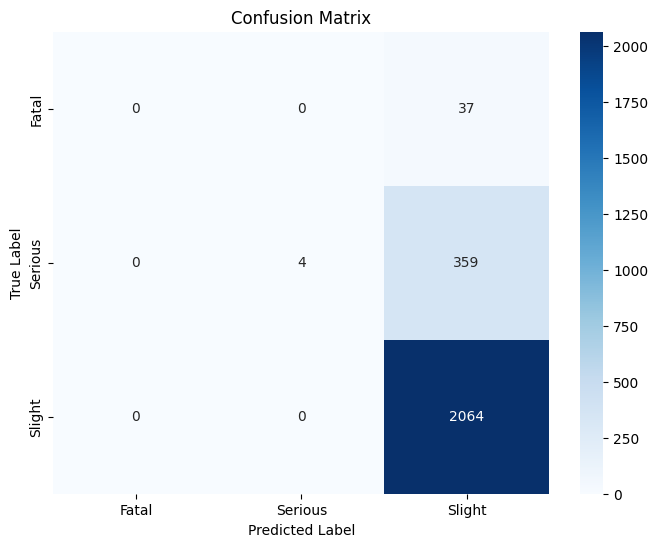

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Fatal', 'Serious', 'Slight'], 
            yticklabels=['Fatal', 'Serious', 'Slight'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [8]:
pip install --upgrade pip

  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install -U imbalanced-learn